# H1: Centralización Fiscal Estructural (Capital vs. Periferia)

✅ Datos cargados correctamente.


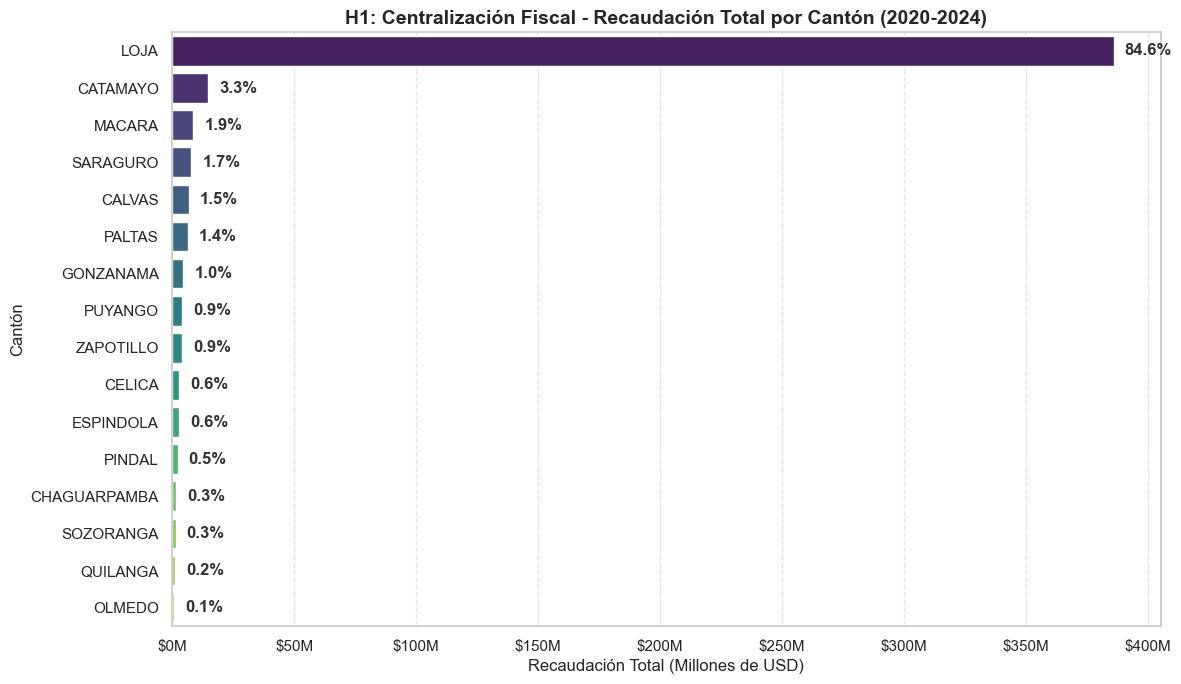

--- INSIGHT ---
La visualización confirma que LOJA domina con el 84.6%, mientras el resto de cantones no supera el 4%.


In [6]:
# ==========================================
# PARTE 1 : Análisis de Centralización Geográfica (H1)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter # Necesario para formatear el eje X

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Un poco más ancho para que quepan las etiquetas

# 1. Carga de Datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("✅ Datos cargados correctamente.")
except FileNotFoundError:
    print("⚠️ Error: No se encuentra el archivo .csv.")

# 2. Procesamiento: Agrupación por Cantón
recaudacion_canton = df.groupby(['CANTON', 'CLUSTER_GEO'])['VALOR_RECAUDADO'].sum().reset_index()
recaudacion_canton = recaudacion_canton.sort_values('VALOR_RECAUDADO', ascending=False)

# Cálculo de porcentajes para uso posterior
total_provincial = recaudacion_canton['VALOR_RECAUDADO'].sum()
recaudacion_canton['PORCENTAJE'] = (recaudacion_canton['VALOR_RECAUDADO'] / total_provincial) * 100

# 3. Visualización: Ranking de Cantones Mejorado
plt.figure(figsize=(12, 7))

# Crear el gráfico
ax = sns.barplot(
    data=recaudacion_canton, 
    x='VALOR_RECAUDADO', 
    y='CANTON', 
    hue='CANTON', 
    palette='viridis'
)

# MEJORA 1: Eje X con formato de Millones (ej: $50M)
def currency_millions(x, pos):
    return f'${x/1e6:,.0f}M'

ax.xaxis.set_major_formatter(FuncFormatter(currency_millions))

# MEJORA 2: Etiquetas de porcentaje en cada barra
# Iteramos sobre cada "parche" (barra) del gráfico
for p in ax.patches:
    width = p.get_width()
    # Solo ponemos etiqueta si la barra tiene valor (evita errores con nulos)
    if width > 0:
        # Calculamos el % basado en el ancho de la barra vs el total
        pct_value = (width / total_provincial) * 100
        
        # Posición: Un poco a la derecha del final de la barra
        x_pos = width + (total_provincial * 0.01) 
        y_pos = p.get_y() + p.get_height() / 2
        
        ax.text(
            x_pos, 
            y_pos, 
            f'{pct_value:.1f}%', # Formato con 1 decimal
            va='center', 
            fontweight='bold', 
            color='#333333'
        )

# Títulos y Ajustes
plt.title('H1: Centralización Fiscal - Recaudación Total por Cantón (2020-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Recaudación Total (Millones de USD)')
plt.ylabel('Cantón')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Si aparece leyenda automática, la removemos para limpiar
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

# Insight rápido en texto
top_canton = recaudacion_canton.iloc[0]
print(f"--- INSIGHT ---")
print(f"La visualización confirma que {top_canton['CANTON']} domina con el {top_canton['PORCENTAJE']:.1f}%, "
      f"mientras el resto de cantones no supera el 4%.")

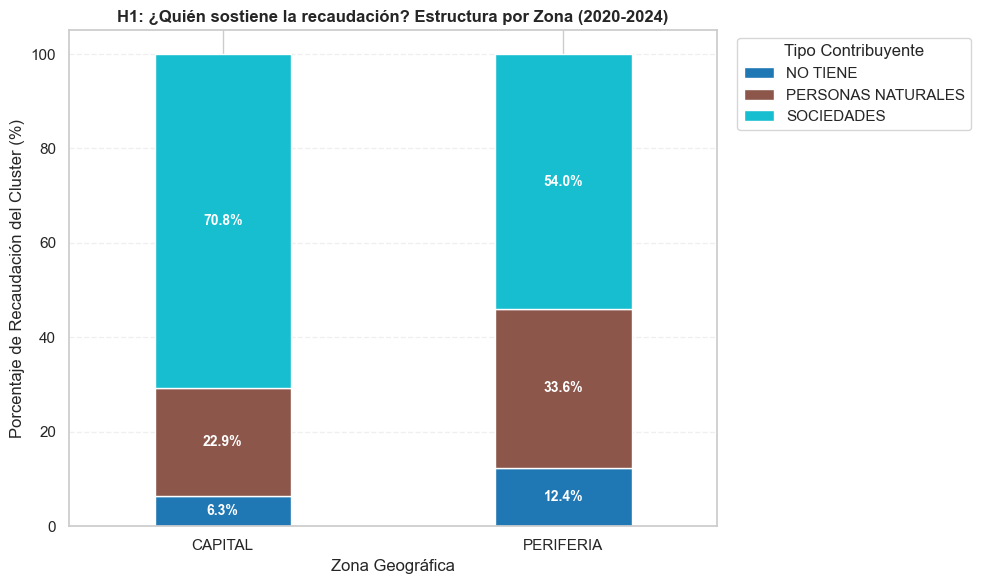

--- INSIGHT ---
Se observa claramente cómo el peso de 'Personas Naturales' sube del
22.9% en la Capital al 33.6% en la Periferia.


In [7]:
# ==========================================
# PARTE 2 MEJORADA: Estructura del Contribuyente con Etiquetas
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# 1. Procesamiento: Agrupación por Cluster y Tipo
recaudacion_tipo = df.groupby(['CLUSTER_GEO', 'TIPO_CONTRIBUYENTE'])['VALOR_RECAUDADO'].sum().reset_index()

# Cálculo de porcentajes intra-cluster
recaudacion_tipo['TOTAL_CLUSTER'] = recaudacion_tipo.groupby('CLUSTER_GEO')['VALOR_RECAUDADO'].transform('sum')
recaudacion_tipo['PCT_INTRA_CLUSTER'] = (recaudacion_tipo['VALOR_RECAUDADO'] / recaudacion_tipo['TOTAL_CLUSTER']) * 100

# Pivoteo para gráfico apilado
pivot_tipo = recaudacion_tipo.pivot(index='CLUSTER_GEO', columns='TIPO_CONTRIBUYENTE', values='PCT_INTRA_CLUSTER')

# 2. Visualización: Gráfico Apilado
plt.figure(figsize=(10, 6)) # Tamaño ligeramente aumentado para claridad

# Guardamos el objeto 'ax' (ejes) al crear el gráfico
ax = pivot_tipo.plot(kind='bar', stacked=True, colormap='tab10', width=0.4, ax=plt.gca())

# --- MEJORA: Bucle para añadir etiquetas de porcentaje ---
# Recorremos cada "contenedor" (cada grupo de barras del mismo color)
for container in ax.containers:
    labels = ax.bar_label(
        container, 
        fmt='%.1f%%', 
        label_type='center', 
        color='white', 
        fontweight='bold',
        fontsize=10
    )
    # Opcional: Ocultar etiquetas si la barra es muy pequeña (< 3%) para no amontonar
    for label in labels:
        if float(label.get_text().strip('%')) < 3:
            label.set_visible(False)

# Títulos y Ajustes
plt.title('H1: ¿Quién sostiene la recaudación? Estructura por Zona (2020-2024)', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje de Recaudación del Cluster (%)')
plt.xlabel('Zona Geográfica')
plt.legend(title='Tipo Contribuyente', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3) # Grid sutil ayuda a la lectura

plt.tight_layout()
plt.show()

# Insight rápido
print("--- INSIGHT ---")
print("Se observa claramente cómo el peso de 'Personas Naturales' sube del")
print(f"22.9% en la Capital al 33.6% en la Periferia.")

# H2: Estacionalidad Diferenciada del Ciclo Fiscal

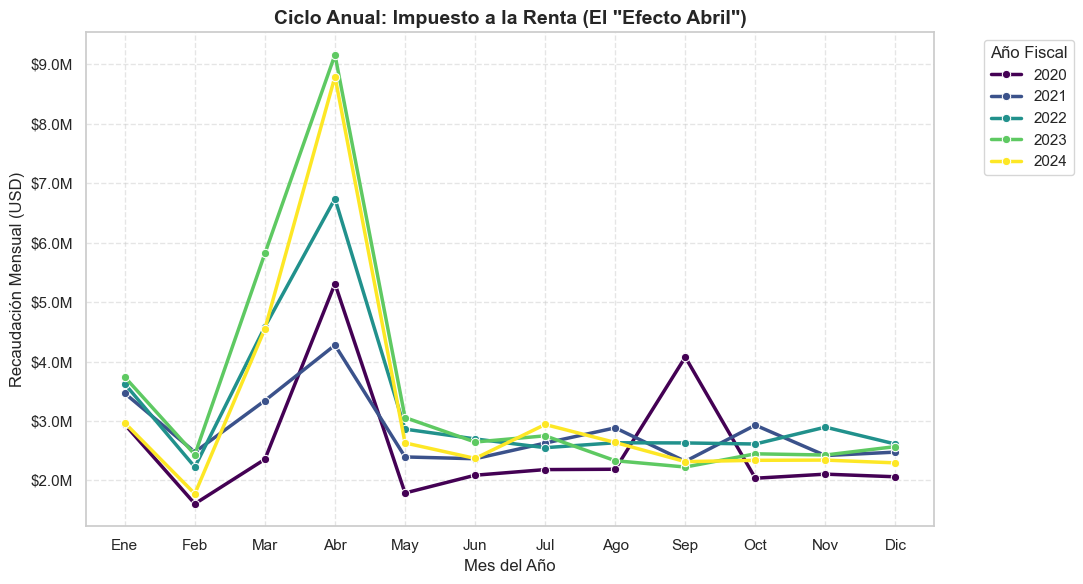

--- INSIGHT RENTA ---
Se observa claramente el pico de Abril sin obstrucciones visuales.


In [8]:
# ==========================================
# PARTE 2.1: Estacionalidad del IMPUESTO A LA RENTA 
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Asegúrate de que df ya está cargado
# df = pd.read_csv('Dataset_Loja_Preprocesado.csv')

# 1. Filtrado
df_renta = df[df['GRUPO_IMPUESTO'] == 'IMPUESTO A LA RENTA GLOBAL'].copy()

# 2. Agrupación
renta_evolution = df_renta.groupby(['ANIO', 'DIA_MES'])['VALOR_RECAUDADO'].sum().reset_index()

# 3. Visualización
plt.figure(figsize=(11, 6)) # Aumentamos un poco el ancho para que quepa la leyenda

sns.lineplot(
    data=renta_evolution, 
    x='DIA_MES', 
    y='VALOR_RECAUDADO', 
    hue='ANIO', 
    palette='viridis', 
    marker='o',
    linewidth=2.5
)

# --- Formato ---
plt.title('Ciclo Anual: Impuesto a la Renta (El "Efecto Abril")', fontsize=14, fontweight='bold')
plt.xlabel('Mes del Año')
plt.ylabel('Recaudación Mensual (USD)')

# Eje X
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(1, 13), month_names)

# Eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e6:,.1f}M'))
plt.grid(True, linestyle='--', alpha=0.5)

# --- LEYENDA FUERA DEL GRÁFICO ---
# bbox_to_anchor=(x, y): x>1 lo mueve a la derecha, y=1 lo alinea arriba
plt.legend(title='Año Fiscal', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

print("--- INSIGHT RENTA ---")
print("Se observa claramente el pico de Abril sin obstrucciones visuales.")

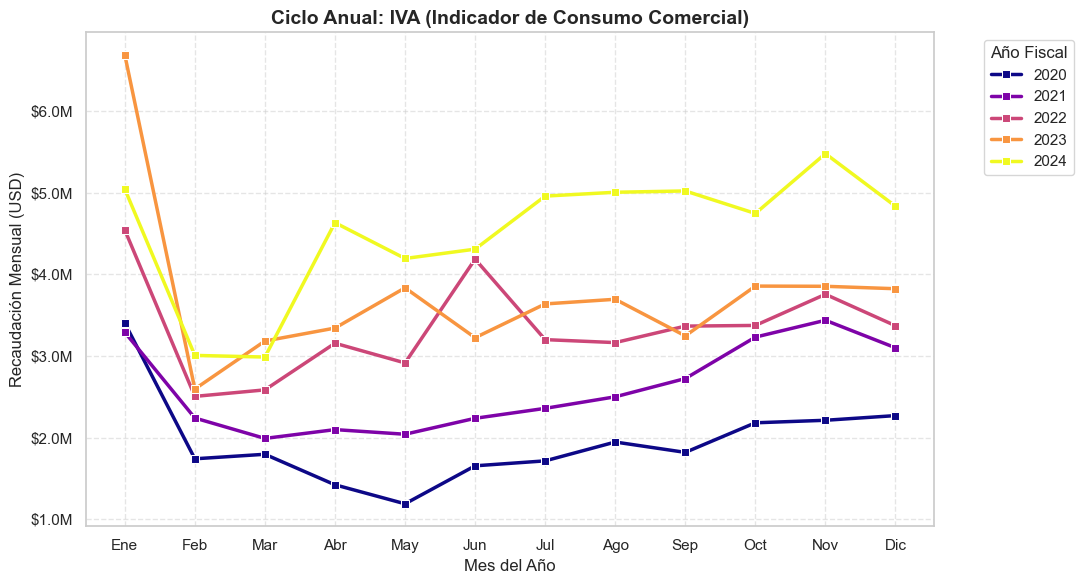

--- INSIGHT IVA ---
A diferencia de la Renta, el IVA muestra una tendencia más plana y estable,
con un leve crecimiento hacia finales de año (Nov-Dic) por festividades.


In [9]:
# ==========================================
# PARTE 2.2: Estacionalidad del IVA 
# ==========================================

# 1. Filtrado Específico: Solo IVA
df_iva = df[df['GRUPO_IMPUESTO'] == 'IMPUESTO AL VALOR AGREGADO'].copy()

# 2. Agrupación
iva_evolution = df_iva.groupby(['ANIO', 'DIA_MES'])['VALOR_RECAUDADO'].sum().reset_index()

# 3. Visualización
plt.figure(figsize=(11, 6)) # Ancho ajustado para la leyenda

sns.lineplot(
    data=iva_evolution, 
    x='DIA_MES', 
    y='VALOR_RECAUDADO', 
    hue='ANIO', 
    palette='plasma', # Paleta distinta (fuego/violeta) para diferenciar del Renta
    marker='s',      # Marcador cuadrado
    linewidth=2.5
)

# --- Formato ---
plt.title('Ciclo Anual: IVA (Indicador de Consumo Comercial)', fontsize=14, fontweight='bold')
plt.xlabel('Mes del Año')
plt.ylabel('Recaudación Mensual (USD)')

# Eje X
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e6:,.1f}M'))
plt.grid(True, linestyle='--', alpha=0.5)

# --- LEYENDA FUERA DEL GRÁFICO ---
plt.legend(title='Año Fiscal', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

print("--- INSIGHT IVA ---")
print("A diferencia de la Renta, el IVA muestra una tendencia más plana y estable,")
print("con un leve crecimiento hacia finales de año (Nov-Dic) por festividades.")

Datos cargados: 167785 registros.

--- GENERANDO GRÁFICAS MONO-VARIANTE ---


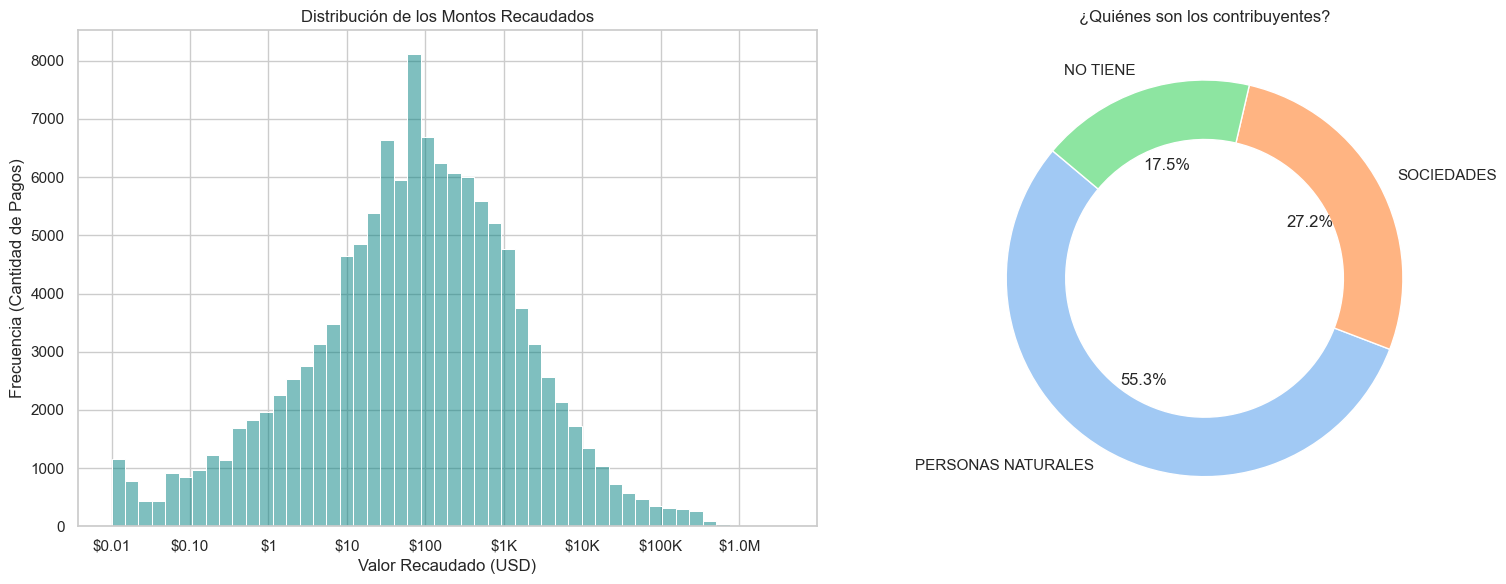

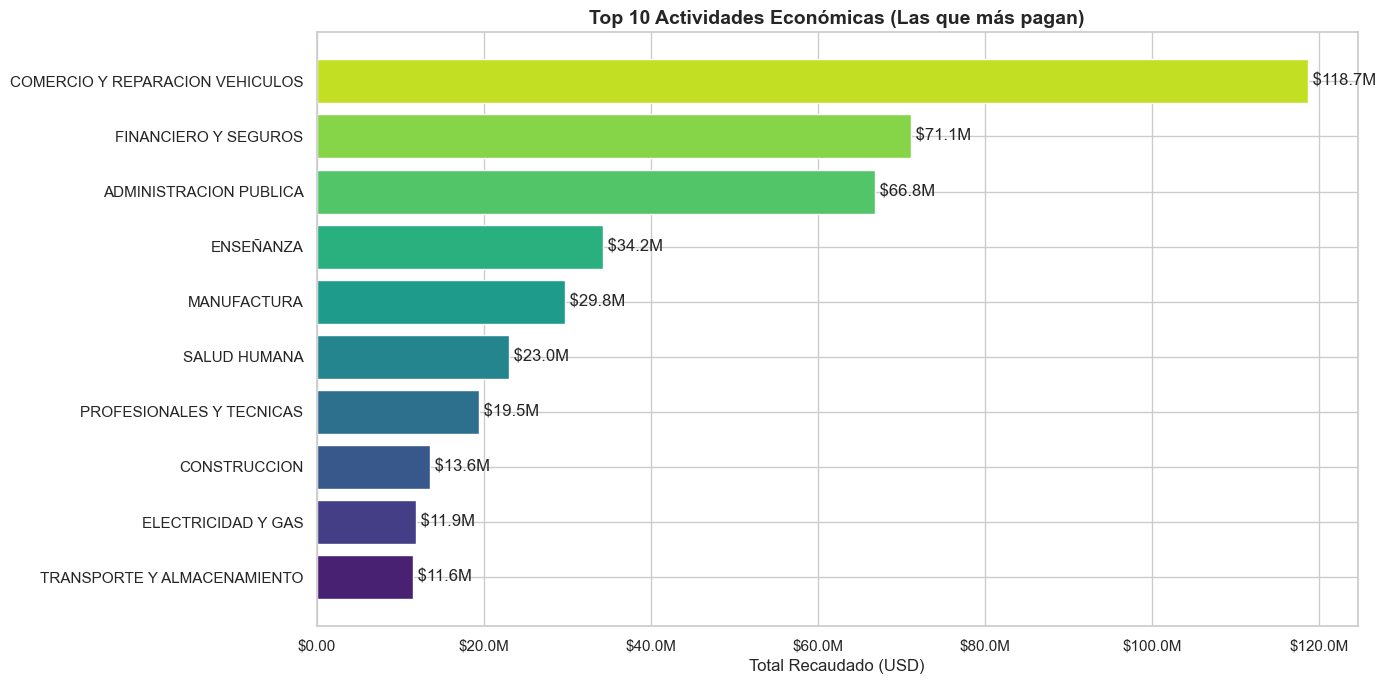


--- GENERANDO GRÁFICAS BI-VARIANTE ---


C:\Users\santi\AppData\Local\Temp\ipykernel_9472\1599374074.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VALOR_RECAUDADO', y='SEGMENTO_PAGO', data=df, palette="Set2")


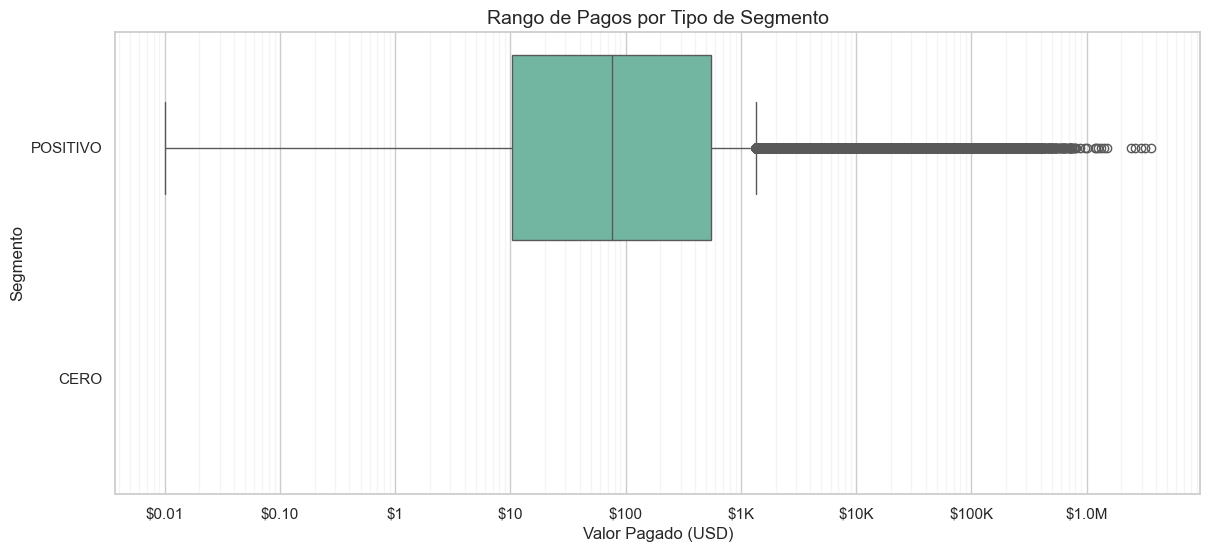

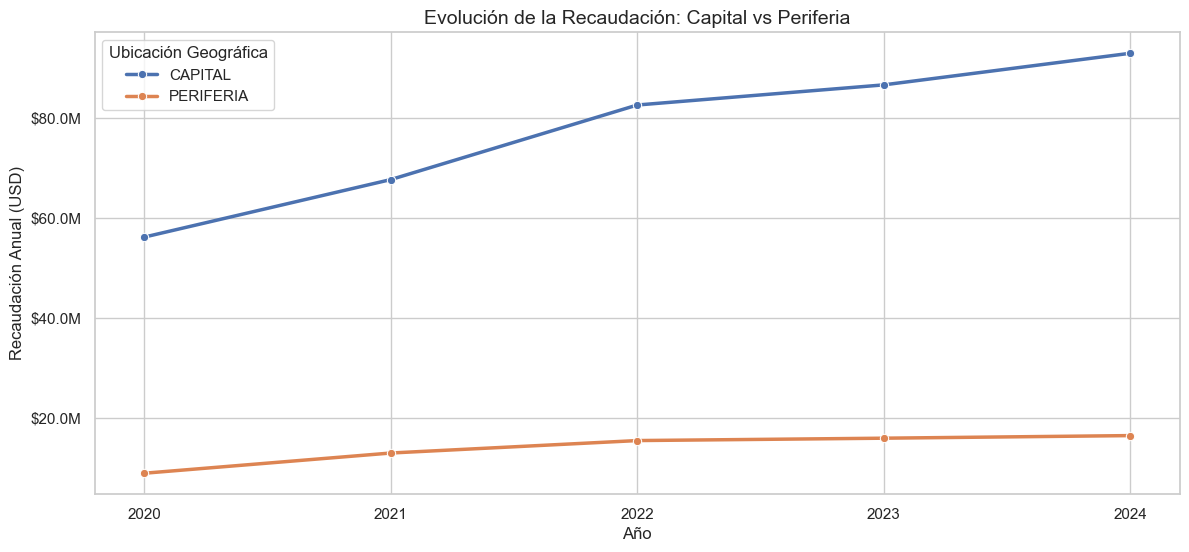


--- GENERANDO GRÁFICAS MULTI-VARIANTE (AJUSTADAS) ---


C:\Users\santi\AppData\Local\Temp\ipykernel_9472\1599374074.py:127: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  anotaciones = matriz_calor.applymap(lambda x: currency_fmt(x, None) if pd.notnull(x) else "")


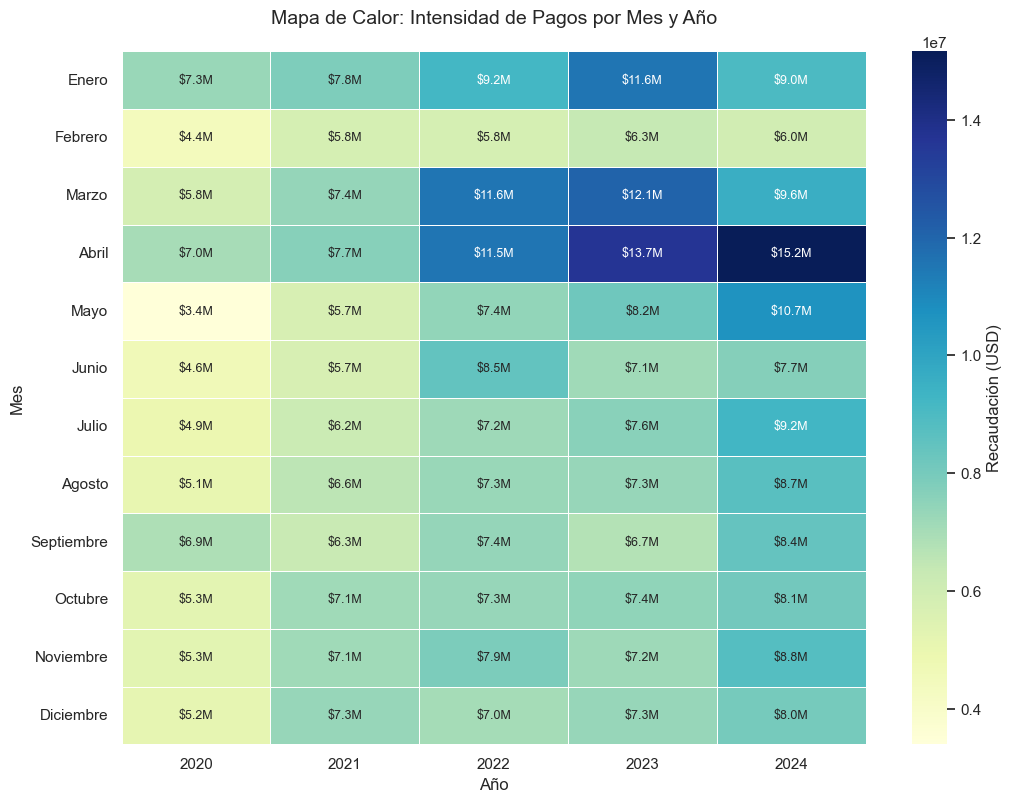


--- GENERANDO DISPERSIÓN (FILTRANDO $0 PARA VER MEJOR) ---


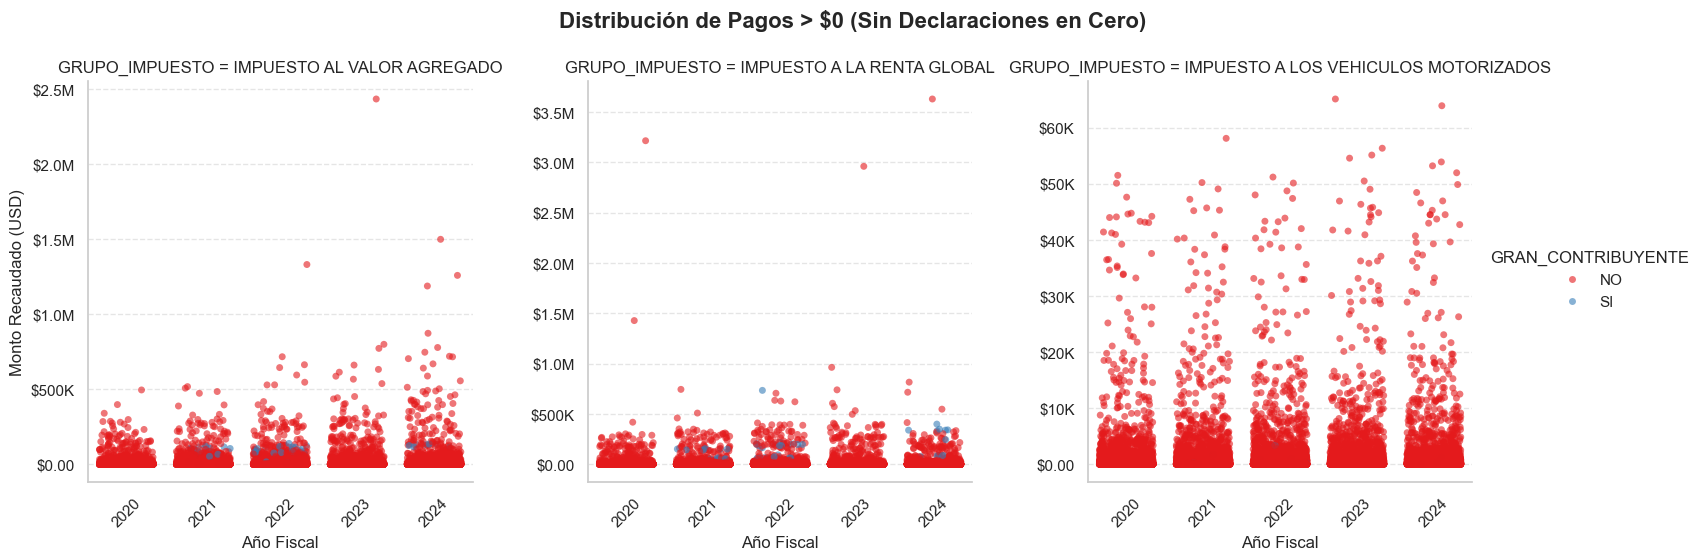


 DATO CURIOSO: Hay 12569 registros que son mayores a $0 pero menores a $1 (centavos).


In [10]:
# =============================================================================
# BLOQUE INTEGRAL DE VISUALIZACIÓN: MONO, BI Y MULTI-VARIANTE (VERSIÓN EJECUTIVA)
# =============================================================================

# --- 1. CONFIGURACIÓN INICIAL ---
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (14, 8)
pd.options.display.float_format = '{:,.2f}'.format

# FORMATO DE DINERO HUMANO (Sin notación científica)
def currency_fmt(x, pos):
    """Convierte números a formato legible: $1K, $1M, $10"""
    if x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.0f}K'
    elif x >= 1:
        return f'${x:.0f}' # Para valores pequeños como $10, $50
    else:
        return f'${x:.2f}' # Para centavos si los hubiera

formatter = FuncFormatter(currency_fmt)

# Cargar datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print(f"Datos cargados: {df.shape[0]} registros.")
except FileNotFoundError:
    print("Error: No se encuentra 'Dataset_Loja_Preprocesado.csv'.")
    df = pd.DataFrame() 

if not df.empty:
    
    # =========================================================================
    #  A. ANÁLISIS MONO-VARIANTE
    # =========================================================================
    print("\n--- GENERANDO GRÁFICAS MONO-VARIANTE ---")
    
    # A.1 Distribución de Recaudación (Log Scale con números reales)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histograma
    sns.histplot(df['VALOR_RECAUDADO'], bins=50, log_scale=True, kde=True, ax=axes[0], color='teal')
    
    # CORRECCIÓN VISUAL: Eje X con números normales, no potencias de 10
    axes[0].xaxis.set_major_formatter(formatter) 
    axes[0].set_title('Distribución de los Montos Recaudados', fontsize=12)
    axes[0].set_xlabel('Valor Recaudado (USD)') # Etiqueta clara
    axes[0].set_ylabel('Frecuencia (Cantidad de Pagos)')
    
    # A.2 Composición del Contribuyente
    tipo_counts = df['TIPO_CONTRIBUYENTE'].value_counts()
    axes[1].pie(tipo_counts, labels=tipo_counts.index, autopct='%1.1f%%', startangle=140, 
                colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3))
    axes[1].set_title('¿Quiénes son los contribuyentes?', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    # A.3 Top 10 Actividades
    plt.figure(figsize=(14, 7))
    top_activities = df.groupby('DESCRIPCION_ACT_ECONOMICA')['VALOR_RECAUDADO'].sum().nlargest(10).sort_values()
    
    bars = plt.barh(top_activities.index, top_activities.values, color=sns.color_palette("viridis", 10))
    plt.title('Top 10 Actividades Económicas (Las que más pagan)', fontsize=14, fontweight='bold')
    plt.xlabel('Total Recaudado (USD)')
    plt.gca().xaxis.set_major_formatter(formatter)
    
    # Etiquetas de valor en las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {currency_fmt(width,0)}', va='center')
    
    plt.tight_layout()
    plt.show()

    # =========================================================================
    # B. ANÁLISIS BI-VARIANTE
    # =========================================================================
    print("\n--- GENERANDO GRÁFICAS BI-VARIANTE ---")

    # B.1 Rendimiento por Segmento (Boxplot Legible)
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='VALOR_RECAUDADO', y='SEGMENTO_PAGO', data=df, palette="Set2")
    
    plt.xscale('log') # Mantenemos log para ver la distribución
    # CORRECCIÓN VISUAL: Forzar formato de dinero en el eje logarítmico
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().xaxis.set_minor_formatter(FuncFormatter(lambda x, _: '')) # Ocultar etiquetas menores sucias
    
    plt.title('Rango de Pagos por Tipo de Segmento', fontsize=14)
    plt.xlabel('Valor Pagado (USD)')
    plt.ylabel('Segmento')
    plt.grid(True, axis='x', which='minor', alpha=0.2)
    plt.show()

    # B.2 Evolución Temporal (Año vs Anio)
    evolucion_cluster = df.groupby(['ANIO', 'CLUSTER_GEO'])['VALOR_RECAUDADO'].sum().reset_index()
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=evolucion_cluster, x='ANIO', y='VALOR_RECAUDADO', hue='CLUSTER_GEO', 
                 marker='o', linewidth=2.5, palette='deep')
    
    plt.title('Evolución de la Recaudación: Capital vs Periferia', fontsize=14)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.xlabel('Año') # <--- CAMBIO: Etiqueta "Año" explicita
    plt.ylabel('Recaudación Anual (USD)')
    plt.xticks(evolucion_cluster['ANIO'].unique().astype(int)) # Años enteros en el eje X
    plt.legend(title='Ubicación Geográfica')
    plt.show()

# =========================================================================
    # C. ANÁLISIS MULTI-VARIANTE (MEJORADO Y ESPACIADO)
    # =========================================================================
    print("\n--- GENERANDO GRÁFICAS MULTI-VARIANTE (AJUSTADAS) ---")

    # C.1 Heatmap de Estacionalidad (CON ANOTACIONES DINÁMICAS)
    heatmap_data = df.groupby(['ANIO', 'NOMBRE_MES'])['VALOR_RECAUDADO'].sum().reset_index()
    
    matriz_calor = heatmap_data.pivot(index='NOMBRE_MES', columns='ANIO', values='VALOR_RECAUDADO')
    orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    matriz_calor = matriz_calor.reindex(orden_meses)

    # --- NUEVA LÓGICA PARA ANOTACIONES ---
    # Creamos una matriz de texto formateada ($1.2M, $500K, etc.) para que quepa en las celdas
    anotaciones = matriz_calor.applymap(lambda x: currency_fmt(x, None) if pd.notnull(x) else "")

    plt.figure(figsize=(12, 9)) # Aumentamos un poco el ancho para los números
    sns.heatmap(
        matriz_calor, 
        cmap='YlGnBu', 
        annot=anotaciones,    # <-- Usamos la matriz de texto que creamos
        fmt="",               # <-- Importante: "" porque el formato ya viene en el texto
        annot_kws={'size': 9}, # Tamaño de letra pequeño para que no se amontone
        linewidths=.5, 
        cbar_kws={'label': 'Recaudación (USD)'}
    )
    
    plt.title('Mapa de Calor: Intensidad de Pagos por Mes y Año', fontsize=14, pad=20)
    plt.xlabel('Año')
    plt.ylabel('Mes')
    plt.yticks(rotation=0)
    plt.show()

    # C.2 FacetGrid (CORREGIDO: Espaciado y Filtro de Ceros)
    print("\n--- GENERANDO DISPERSIÓN (FILTRANDO $0 PARA VER MEJOR) ---")
    
    top_impuestos = df['GRUPO_IMPUESTO'].value_counts().nlargest(3).index
    
    # FILTRO CLAVE: Quitamos los $0 exactos solo para esta gráfica
    # Así evitamos saturar la parte baja y vemos si hay centavos (0.01)
    df_subset = df[
        (df['GRUPO_IMPUESTO'].isin(top_impuestos)) & 
        (df['VALOR_RECAUDADO'] > 0)
    ].copy()
    
    df_subset['ANIO'] = df_subset['ANIO'].astype(int).astype(str)
    
    g = sns.catplot(
        data=df_subset, 
        x="ANIO", 
        y="VALOR_RECAUDADO", 
        col="GRUPO_IMPUESTO", 
        hue="GRAN_CONTRIBUYENTE",
        kind="strip",
        jitter=0.35,        # AUMENTADO: Más separación horizontal de puntos
        height=5.5,         # AUMENTADO: Un poco más alto
        aspect=0.9,         # Un poco más angosto para que quepan bien
        palette="Set1",
        alpha=0.6,
        sharey=False
    )
    
    # 1. ESPACIADO SUPERIOR (La solución a tu problema de etiquetas juntas)
    g.fig.subplots_adjust(top=0.85, wspace=0.3) 
    
    g.fig.suptitle("Distribución de Pagos > $0 (Sin Declaraciones en Cero)", fontsize=16, fontweight='bold')
    g.set_axis_labels("Año Fiscal", "Monto Recaudado (USD)")
    
    # Ajustes en cada cuadro
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(formatter)
        ax.grid(True, axis='y', linestyle='--', alpha=0.5)
        
        # Rotar los años si se ven muy juntos
        plt.setp(ax.get_xticklabels(), rotation=45)

    plt.show()
    
    # VERIFICACIÓN RÁPIDA DE LOS CENTAVOS
    # Esto te imprimirá en texto cuántos registros son "basura" o muy bajos
    bajos = df[(df['VALOR_RECAUDADO'] > 0) & (df['VALOR_RECAUDADO'] < 1)].shape[0]
    print(f"\n DATO CURIOSO: Hay {bajos} registros que son mayores a $0 pero menores a $1 (centavos).")